### Problem Statement

Given dataset named **`"weather_classification_data.csv"`**, which includes several parameters affecting weather conditions. The dataset comprises the following columns:

- temperature: The temperature in degrees Celsius.
- humidity: The humidity percentage.
- wind_speed: The wind speed in kilometers per hour.
- precipitation (%): The precipitation percentage.
- cloud_cover: The cloud cover description.
- atmospheric_pressure: The atmospheric pressure in hPa.
- uv_index: The UV index.
- season: The season during which the data was recorded.
- visibility (km): The visibility in kilometers.
- location: The type of location where the data was recorded.
- weather_type: The target variable for classification, indicating the weather type (Rainy, Sunny, Cloudy, Snowy).
  
Built and evaluated machine learning models that predict the weather type based on the given parameters.Also performed preprocessing, exploratory data analysis, and model training using Support Vector Machine (SVM) with different kernels.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("weather_classification_data.csv")

print(df.shape)

df.head()

(13200, 11)


,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


###  Visualising the distribution of key features

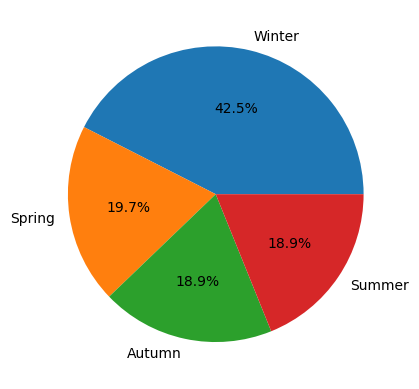

In [3]:
import matplotlib.pyplot as plt

seasons_count = df['season'].value_counts()
plt.pie(x=seasons_count.values,labels=seasons_count.index,autopct="%1.1f%%")
plt.show()


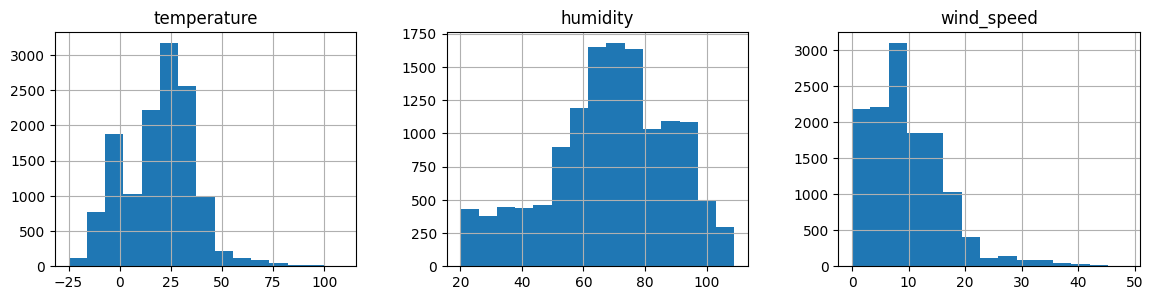

In [4]:
df[['temperature','humidity','wind_speed']].hist(bins=15,figsize=(14,7),layout=(2,3))
plt.show()

<Axes: xlabel='precipitation (%)'>

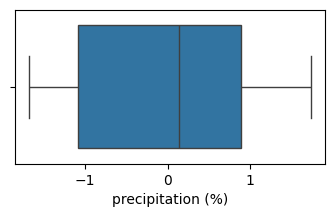

In [26]:
import seaborn as sns
plt.figure(figsize=(4,2))
sns.boxplot(x='precipitation (%)',data=df)

### Data Transformation
    - one hot encoding
    - scaling : Stanedard Scaler

In [6]:
df = pd.get_dummies(df,columns=['cloud_cover','location','season'],drop_first=True)

In [7]:
df.info()
numeric_features = df.select_dtypes(include=['int64','float64']).columns
df[numeric_features]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temperature                13200 non-null  int64  
 1   humidity                   13200 non-null  int64  
 2   wind_speed                 13200 non-null  float64
 3   precipitation (%)          13200 non-null  int64  
 4   atmospheric_pressure       13200 non-null  float64
 5   uv_index                   13200 non-null  int64  
 6   visibility (km)            13200 non-null  float64
 7   weather_type               13200 non-null  object 
 8   cloud_cover_cloudy         13200 non-null  bool   
 9   cloud_cover_overcast       13200 non-null  bool   
 10  cloud_cover_partly cloudy  13200 non-null  bool   
 11  location_inland            13200 non-null  bool   
 12  location_mountain          13200 non-null  bool   
 13  season_Spring              13200 non-null  boo

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km)
0,14,73,9.5,82,1010.82,2,3.5
1,39,96,8.5,71,1011.43,7,10.0
2,30,64,7.0,16,1018.72,5,5.5
3,38,83,1.5,82,1026.25,7,1.0
4,27,74,17.0,66,990.67,1,2.5
...,...,...,...,...,...,...,...
13195,10,74,14.5,71,1003.15,1,1.0
13196,-1,76,3.5,23,1067.23,1,6.0
13197,30,77,5.5,28,1012.69,3,9.0
13198,3,76,10.0,94,984.27,0,2.0


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [9]:
df.head()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,Rainy,False,False,True,True,False,False,False,True
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,Cloudy,False,False,True,True,False,True,False,False
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,Sunny,False,False,False,False,True,True,False,False
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,Sunny,False,False,False,False,False,True,False,False
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,Rainy,False,True,False,False,True,False,False,True


### Model Training Using SVM with Linear Kernel

In [10]:
X = df.drop('weather_type',axis=1)
y = df['weather_type']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train,y_train)
print("linear accuracy ==> ",model.score(X_test,y_test))

linear accuracy ==>  0.8845959595959596


In [12]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_pred,y_test)
print(report)
print("*" * 50)
print("Confusion Matrix")
cm = confusion_matrix(y_pred,y_test)
cm


              precision    recall  f1-score   support

      Cloudy       0.84      0.86      0.85       938
       Rainy       0.87      0.87      0.87       975
       Snowy       0.94      0.88      0.91      1102
       Sunny       0.88      0.92      0.90       945

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.89      0.88      0.88      3960

**************************************************
Confusion Matrix


array([[806,  49,  26,  57],
       [ 82, 852,  12,  29],
       [ 28,  67, 974,  33],
       [ 39,  14,  21, 871]])

### Model Training Using SVM with RBF Kernel


In [13]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train,y_train)

print("rbf accuracy ==> ",model_rbf.score(X_test,y_test))

y_pred_rbf = model_rbf.predict(X_test)

report_rbf = classification_report(y_pred_rbf,y_test)
print(report_rbf)
print("*" * 50)

print("Confusion Matrix rbf kernel")
cm_rbf = confusion_matrix(y_pred_rbf,y_test)
cm_rbf

rbf accuracy ==>  0.9055555555555556
              precision    recall  f1-score   support

      Cloudy       0.88      0.86      0.87       975
       Rainy       0.91      0.89      0.90       997
       Snowy       0.94      0.94      0.94      1035
       Sunny       0.89      0.93      0.91       953

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

**************************************************
Confusion Matrix rbf kernel


array([[843,  54,  30,  48],
       [ 64, 891,  14,  28],
       [ 24,  13, 968,  30],
       [ 24,  24,  21, 884]])

###  Experiment with Hyperparameters in SVM

In [14]:
model_custom = SVC(kernel='rbf',C=0.5,gamma='auto',degree=2)
model_custom.fit(X_train,y_train)

print("custom accuracy ==> ",model_custom.score(X_test,y_test))


y_pred_custom = model_custom.predict(X_test)

report_custom = classification_report(y_pred_custom,y_test)
print(report_custom)
print("*" * 50)

print("Confusion Matrix rbf kernel")
cm_custom = confusion_matrix(y_pred_custom,y_test)
cm_custom



custom accuracy ==>  0.898989898989899
              precision    recall  f1-score   support

      Cloudy       0.87      0.87      0.87       958
       Rainy       0.90      0.90      0.90       984
       Snowy       0.94      0.90      0.92      1082
       Sunny       0.88      0.93      0.91       936

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

**************************************************
Confusion Matrix rbf kernel


array([[833,  50,  29,  46],
       [ 62, 882,  10,  30],
       [ 36,  31, 973,  42],
       [ 24,  19,  21, 872]])

### Implementing Sklearn Pipeline


In [15]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('svc',SVC(kernel='rbf'))
])

pipeline.fit(X_train,y_train)

y_pred_pipeline = pipeline.predict(X_test)

report_pipeline = classification_report(y_pred_pipeline,y_test)
print(report_pipeline)

print("*" * 50)
print('confusion matrix')
cm = confusion_matrix(y_pred_pipeline,y_test)
cm

              precision    recall  f1-score   support

      Cloudy       0.88      0.87      0.87       965
       Rainy       0.91      0.89      0.90       999
       Snowy       0.94      0.92      0.93      1051
       Sunny       0.89      0.93      0.91       945

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

**************************************************
confusion matrix


array([[836,  47,  30,  52],
       [ 64, 892,  16,  27],
       [ 29,  22, 971,  29],
       [ 26,  21,  16, 882]])

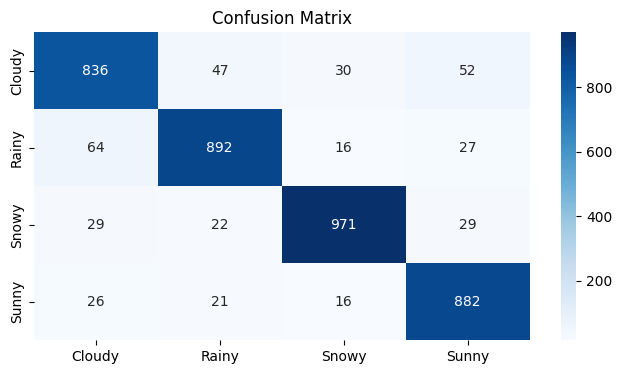

In [24]:
labels = ['Cloudy','Rainy','Snowy','Sunny']
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title("Confusion Matrix")
plt.show()

### Best Models

1. **SVM with Linear Kernel:**
   - Accuracy: 0.8845

2. **SVM with RBF Kernel:**
   - Accuracy: 0.9055

3. **Custom SVM Model:**
   - Accuracy: 0.8989

SVM with "RBF kernel" turned out to be best model for our weather classification